In [6]:
from head import opentrons
import pandas as pd
import numpy as np
from scipy.spatial import distance
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [7]:
class Simulator:
    def __init__(self):
        self.domain = np.linspace(-5,5,num=100)
        
    def generate(self, mu, sig):
        scale = 1/(np.sqrt(2*np.pi)*sig)
        return scale*np.exp(-np.power(self.domain - mu, 2.) / (2 * np.power(sig, 2.)))
    
    def process_batch(self, Cb, fname):
        out = []
        for c in Cb:
            out.append(self.generate(*c))
        out = np.asarray(out)
        df = pd.DataFrame(out.T, index=self.domain)
        df.to_excel(fname, engine='openpyxl')
        
        return 
    
    def make_target(self, ct):
        return self.domain, self.generate(*ct)

In [8]:
from head import AmplitudePhaseDistance

def APdist(f1,f2):
    da, dp = AmplitudePhaseDistance(f1+1e-6,f2+1e-6,xt)
    
    return -(da+dp)
    

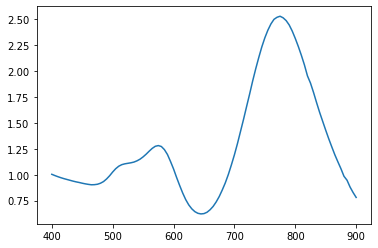

In [9]:
AG = [10,150]
AA = [10,150]
bounds = [AG, AA]
target = pd.read_excel('Target_Rod.xlsx')
target = np.asarray(target)
xt = target[:,0]
yt = target[:,1]
plt.plot(xt,yt)

In [10]:
optim = opentrons.Optimizer(xt, yt, 
                            bounds, 
                            savedir = '../data_AP_ROD',
                            batch_size=4,
                            metric = APdist
                           )
optim.save()

INFO: Getting suggestions for iteration 0
INFO: Iteration : 0, Samples to be made
INFO: 0	[66.33221434 22.86868734]
INFO: 1	[31.51409796 50.72001452]
INFO: 2	[99.64753031 72.19297898]
INFO: 3	[119.38123297 145.11514165]
INFO: ==============================


In [11]:
# random iteration
optim.save()
optim.update('../data_AP_ROD/0.xlsx')
optim.suggest_next()
optim.get_current_best()
optim.save()

INFO: Getting suggestions for iteration 1
INFO: Iteration : 1, Samples to be made
INFO: 0	[ 10.14000001 150.        ]
INFO: 1	[150.          97.32123948]
INFO: 2	[10.14000001 89.62746665]
INFO: 3	[ 76.01106215 111.42029622]
INFO: ==============================
INFO: Iteration : 2 Best estimate [[100.82954343  93.29440236]] with predicted score : [[-0.07539333]]


In [12]:
# random iteration
optim.save()
optim.update('../data_AP_ROD/1.xlsx')
optim.suggest_next()
optim.get_current_best()
optim.save()

INFO: Getting suggestions for iteration 2
INFO: Iteration : 2, Samples to be made
INFO: 0	[110.48861004 105.831123  ]
INFO: 1	[150.         135.05228493]
INFO: 2	[150.          58.77287902]
INFO: 3	[ 82.25412115 150.        ]
INFO: ==============================
INFO: Iteration : 3 Best estimate [[102.17703597 104.12901754]] with predicted score : [[-0.06353429]]


In [15]:
# random iteration
optim.save()
optim.update('../data_AP_ROD/2.xlsx')
optim.suggest_next()
optim.get_current_best()
optim.save()

INFO: Getting suggestions for iteration 3
INFO: Iteration : 3, Samples to be made
INFO: 0	[128.64861628  80.85428658]
INFO: 1	[ 56.1187532 150.       ]
INFO: 2	[124.42356506  10.14000001]
INFO: 3	[ 93.6220847 115.1838583]
INFO: ==============================
INFO: Iteration : 4 Best estimate [[ 83.30890784 117.30408166]] with predicted score : [[-0.05171624]]


In [18]:
# random iteration
optim.save()
optim.update('../data_AP_ROD/3.xlsx')
optim.suggest_next()
optim.get_current_best()
optim.save()

INFO: Getting suggestions for iteration 4
INFO: Iteration : 4, Samples to be made
INFO: 0	[150. 150.]
INFO: 1	[56.13959508 67.7763408 ]
INFO: 2	[ 67.39871169 131.97212622]
INFO: 3	[84.53683604 91.08274805]
INFO: ==============================
INFO: Iteration : 5 Best estimate [[102.8038947   95.32988529]] with predicted score : [[-0.05657517]]


In [19]:
# random iteration
optim.save()
optim.update('../data_AP_ROD/4.xlsx')
optim.suggest_next()
optim.get_current_best()
optim.save()

INFO: Getting suggestions for iteration 5
INFO: Iteration : 5, Samples to be made
INFO: 0	[10.14000001 48.71855065]
INFO: 1	[80.64279897 55.29816335]
INFO: 2	[10.14000001 29.13457035]
INFO: 3	[135.05377058 116.63042835]
INFO: ==============================
INFO: Iteration : 6 Best estimate [[111.11307615  89.69427648]] with predicted score : [[-0.05754995]]


In [20]:
# random iteration
optim.save()
optim.update('../data_AP_ROD/5.xlsx')
optim.suggest_next()
optim.get_current_best()
optim.save()

INFO: Getting suggestions for iteration 6
INFO: Iteration : 6, Samples to be made
INFO: 0	[ 92.4545246  101.13015431]
INFO: 1	[94.76198687 50.32452313]
INFO: 2	[15.37640806 57.25719301]
INFO: 3	[10.14000001 10.14000001]
INFO: ==============================
INFO: Iteration : 7 Best estimate [[121.2899922   97.98226297]] with predicted score : [[-0.05850066]]


In [21]:
# random iteration
optim.save()
optim.update('../data_AP_ROD/6.xlsx')
optim.suggest_next()
optim.get_current_best()
optim.save()

INFO: Getting suggestions for iteration 7
INFO: Iteration : 7, Samples to be made
INFO: 0	[10.14000001 38.25992478]
INFO: 1	[104.96708645 130.37374383]
INFO: 2	[150.          73.75018232]
INFO: 3	[ 21.54876285 119.05747208]
INFO: ==============================
INFO: Iteration : 8 Best estimate [[10.14000001 38.11346259]] with predicted score : [[-0.03566139]]


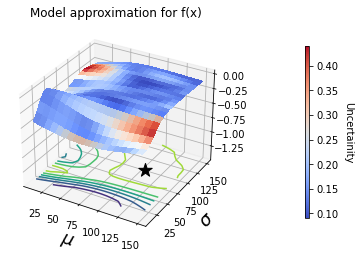

In [22]:
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
from matplotlib import cm
from matplotlib.colors import Normalize
import head
import torch
target = [110,90]
tkwargs = {
    "dtype": torch.double,
    "device": torch.device("cuda" if torch.cuda.is_available() else "cpu"),
}

fig, ax = plt.subplots(subplot_kw={'projection':'3d'})

ax.set_xlabel(r'$\mu$', fontsize=18)
ax.set_ylabel(r'$\sigma$', fontsize=18)
with torch.no_grad():
    num_grid_spacing = 20
    mu_grid = np.linspace(*bounds[0], num=num_grid_spacing)
    sig_grid = np.linspace(*bounds[1], num=num_grid_spacing)
    test_x = head.Grid(mu_grid, sig_grid).points
    posterior = optim.model.posterior(optim.inp.transform(torch.tensor(test_x).to(**tkwargs)))
    posterior_mean = posterior.mean.cpu().numpy()
    lower, upper = posterior.mvn.confidence_region()
    confidence = np.abs((lower-upper).numpy())
    ls = LightSource(0, 0)
    rgb = ls.shade(confidence.reshape(num_grid_spacing,num_grid_spacing), 
                   cmap=cm.coolwarm, vert_exag=0.1, blend_mode='soft')
    XX, YY = np.meshgrid(mu_grid, sig_grid)
    Z = posterior_mean.reshape(num_grid_spacing,num_grid_spacing)
    sc = ax.plot_surface(XX, YY, Z, 
                    rstride=1, cstride=1, 
                    facecolors=rgb,
                    linewidth=0, antialiased=False, shade=False)
    ax.contour(XX, YY, Z, zdir='z', offset=-1.4, cmap=cm.viridis)
    ax.scatter(target[0], target[1], zs=-1.4, zdir='z', marker='*', s=200,color='k')
    ax.set_title('Model approximation for f(x)')
    cmap = cm.get_cmap('coolwarm')
    norm = Normalize(vmin=confidence.min(), vmax = confidence.max())
    cax = plt.axes([0.95, 0.2, 0.01, 0.6])        
    cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax)
    cbar.ax.set_ylabel('Uncertainity', rotation=270)
    cbar.ax.get_yaxis().labelpad = 15
    
plt.show()

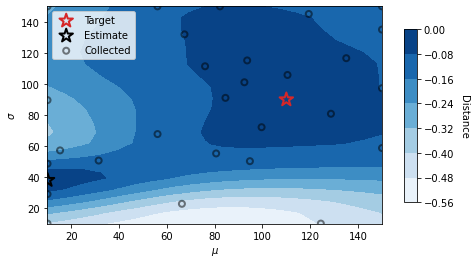

In [23]:
fig, ax = plt.subplots()
im = ax.contourf(XX, YY, Z, cmap=cm.Blues)
ax.scatter(target[0], target[1], 
           marker='*', s=200,color='tab:red', lw=2.0,fc='none', label='Target')
opt_x = optim.best_loc[-1][0]
ax.scatter(opt_x[0], opt_x[1], 
           marker='*', s=200,lw=2.0,fc='none',color='k', label='Estimate')
train_x_unscaled = optim.inp.inverse(optim.train_x)
ax.scatter(train_x_unscaled[:,0], train_x_unscaled[:,1], 
           marker='o', fc='none', edgecolors=(0,0,0), lw=2.0, alpha=0.5, label='Collected')
ax.legend()
ax.set_xlim(bounds[0])
ax.set_ylim(bounds[1])
ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'$\sigma$')

cmap = cm.get_cmap('coolwarm')
norm = Normalize(vmin=confidence.min(), vmax = confidence.max())
cax = plt.axes([0.95, 0.2, 0.03, 0.6])        
cbar = fig.colorbar(im, cax=cax)
cbar.ax.set_ylabel('Distance', rotation=270)
cbar.ax.get_yaxis().labelpad = 15
plt.show()

In [25]:
save_dir = '../data_AP_ROD/'
np.save(save_dir+'confidence.npy', confidence)
np.save(save_dir+'opt_x.npy', opt_x)
np.save(save_dir+'posterior_mean.npy', posterior_mean)
np.save(save_dir+'lower.npy', lower)
np.save(save_dir+'upper.npy', upper)